In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from matplotlib import rcParams as rc
import matplotlib as mpl
import matplotlib.cm as cm
from scipy.integrate import simps
import matplotlib.tri as tri

rc['legend.fontsize']=18
rc['axes.titlesize']=18
rc['lines.linewidth']=2
rc['lines.markersize']=6
rc['font.size']=18
rc['legend.handletextpad']= 0.2
rc['legend.frameon']=False
rc['text.usetex']=True
#print(rc.keys)

10.000000000000002 0.0059155074686532486
10.0 0.00554744002799824
10.000000000000004 0.00575897290246682
10.000000000000004 0.0059108256293349485
10.0 0.006035840518408535


No handles with labels found to put in legend.
/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


10.0 1000.0


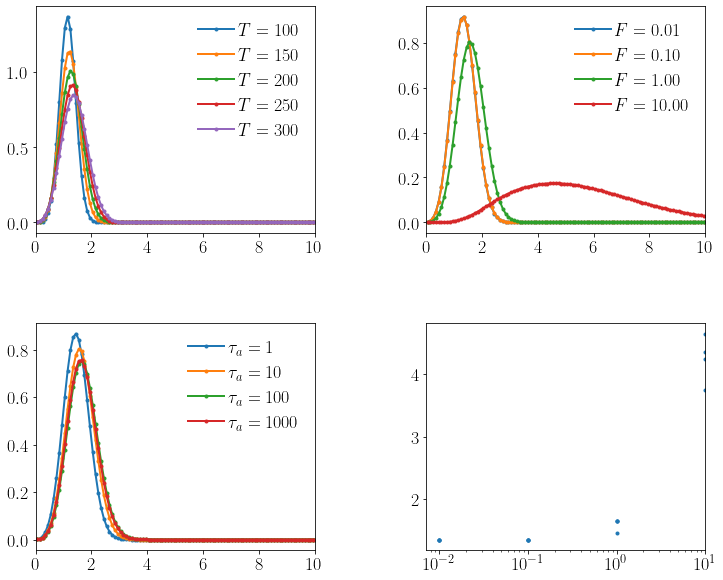

In [196]:
#plot bond lengths
fig,axes=plt.subplots(2,2,figsize=(12,10),gridspec_kw={'wspace':0.4, 'hspace':0.4,})
[[ax1,ax2],[ax3,ax4]]=axes

ind=4
fpath='../../data/ROUSE_chainN100_confinedR0500/'
X,Y=[],[]
bonds=[]
b_av=[]
for fname in os.listdir(fpath):
    if 'bondlens' in fname:
        row=fname.split('_')
        T= float(row[ind].replace('T',''))
        F=float(row[ind+1].replace('F',''))
        Ta=float(row[ind+2].replace('Ta',''))
        kb=float(row[ind+7].replace('kb',''))
        Esoft=float(row[ind+3].replace('Esoft',''))
        R0=float(row[ind+4].replace('R0',''))
        dt=float(row[ind+8].replace('dt',''))
        
        data_npz=np.load(fpath+fname)

        
        if Ta==1. and F==0:
            ax1.plot(data_npz['bins'],data_npz['hist'],'.-', label='$T={:.0f}$'.format(T))
            print(data_npz['hist'].sum(),np.mean(data_npz['hist']*data_npz['bins']))

        if T==250. and Ta==10:
            ax2.plot(data_npz['bins'],data_npz['hist'],'.-', label='$F={:.2f}$'.format(F))

        if T==250. and F==1.0:
            ax3.plot(data_npz['bins'],data_npz['hist'],'.-', label='$\\tau_a={:.0f}$'.format(Ta))

        if T==300:
            X.append(F)
            Y.append(Ta)
            b_av.append(data_npz['bins'][np.where(data_npz['hist']==data_npz['hist'].max())][0])
        # bonds.append(simps(data_npz['bins']*data_npz['hist'], data_npz['bins']))
ax4.semilogx(X,b_av,'.')
ax1.set_xlim(0,5)
ax3.set_xlim(0,5)
for ax in axes.flatten():
    ax.legend()
    ax.set_xlim(0,10)

print(max(X),max(Y))


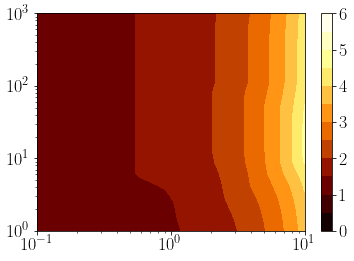

In [165]:
Xi,Yi=np.meshgrid(np.logspace(-2,1,50),np.logspace(0,3,20))
triang=tri.Triangulation(X,Y)
interpZ=tri.LinearTriInterpolator(triang,b_av)
Zi=interpZ(Xi,Yi)
plt.contourf(Xi, Yi, Zi,levels=np.linspace(0,6,13),cmap='afmhot')#,alpha=0.6)
        #ax.contour(Xi, Yi, Zi,colors='k',levels=levels,linewidths=0.3)
plt.loglog()
plt.xlim(0.1,10)

plt.colorbar()
# plt.legend(loc='upper right')


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel/pylab/backend_inline.py:231: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


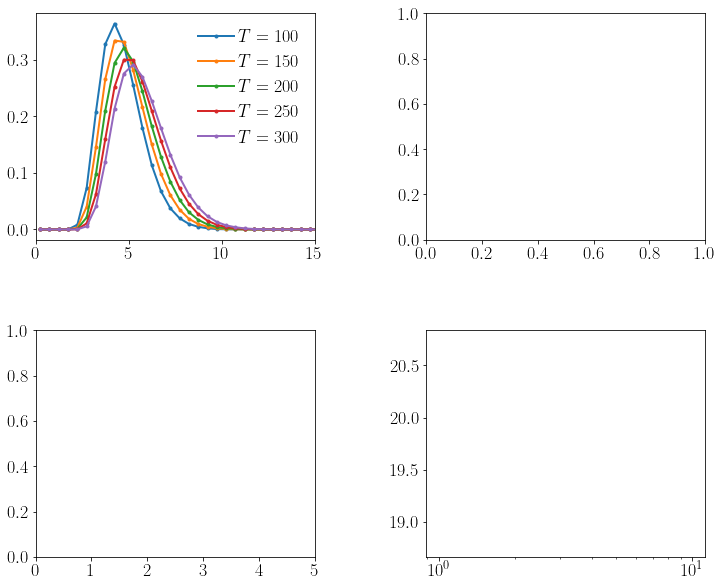

In [4]:
#plot bond lengths
fig,axes=plt.subplots(2,2,figsize=(12,10),gridspec_kw={'wspace':0.4, 'hspace':0.4,})
[[ax1,ax2],[ax3,ax4]]=axes

ind=4
fpath='../../data/ROUSE_chainN100_confinedR0500/'
X,Y=[],[]
bonds=[]
rg_av=[]
par='rg'
for fname in os.listdir(fpath):
    if 'shape_descriptor' in fname:
        row=fname.split('_')
        T= float(row[ind].replace('T',''))
        F=float(row[ind+1].replace('F',''))
        Ta=float(row[ind+2].replace('Ta',''))
        kb=float(row[ind+7].replace('kb',''))
        Esoft=float(row[ind+3].replace('Esoft',''))
        R0=float(row[ind+4].replace('R0',''))
        dt=float(row[ind+8].replace('dt',''))
        
        data_npz=np.load(fpath+fname)

        if Ta==1. and F==0:
            ax1.plot(data_npz[par][1],data_npz[par][0],'.-', label='$T={:.0f}$'.format(T))

            # print(data_npz[par][0].sum(),np.sum(data_npz['rg'][0]*data_npz['rg'][1]))

        if T==250. and Ta==1000:
            ax2.plot(data_npz[par][1],data_npz[par][0],'.-', label='$F={:.2f}$'.format(F))

        if T==250. and F==1:
            ax3.plot(data_npz[par][1],data_npz[par][0],'.-', label='$\\tau_a={:.0f}$'.format(Ta))

        if T==300:
            X.append(F)
            Y.append(Ta)
            rg_av.append(data_npz[par][1][np.where(data_npz[par][1]==data_npz[par][1].max())][0])
        # bonds.append(simps(data_npz['bins']*data_npz['hist'], data_npz['bins']))

ax4.semilogx([xx**2*yy/(0.1*0.0083*300) for xx,yy in zip(X,Y)],rg_av,'.')

ax1.set_xlim(0,15)
ax3.set_xlim(0,5)
for ax in axes.flatten():
    ax.legend()
    # ax.set_xlim(0,200)


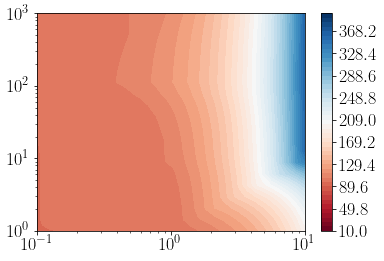

In [205]:
Xi,Yi=np.meshgrid(np.logspace(-2,1,50),np.logspace(0,3,20))
triang=tri.Triangulation(X,Y)
interpZ=tri.LinearTriInterpolator(triang,rg_av)
Zi=interpZ(Xi,Yi)
plt.contourf(Xi, Yi, Zi,levels=np.linspace(10,400,50),cmap='RdBu')#,alpha=0.6)
        #ax.contour(Xi, Yi, Zi,colors='k',levels=levels,linewidths=0.3)
plt.loglog()
plt.xlim(0.1,10)

plt.colorbar()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


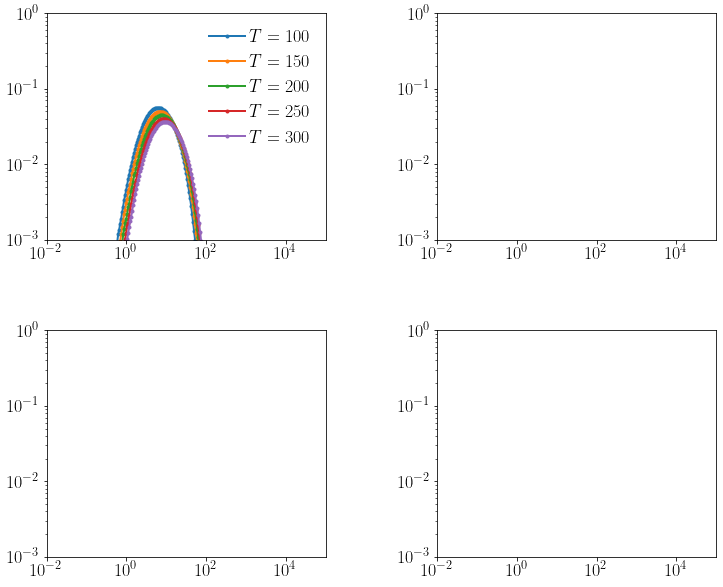

In [8]:
#plot bond lengths
fig,axes=plt.subplots(2,2,figsize=(12,10),gridspec_kw={'wspace':0.4, 'hspace':0.4,})
[[ax1,ax2],[ax3,ax4]]=axes

ind=4
fpath='../../data/ROUSE_chainN100_confinedR0500/'
X,Y=[],[]
bonds=[]
par_av=[]
par='asph'
for fname in os.listdir(fpath):
    if 'shape_descriptor' in fname:
        row=fname.split('_')
        T= float(row[ind].replace('T',''))
        F=float(row[ind+1].replace('F',''))
        Ta=float(row[ind+2].replace('Ta',''))
        kb=float(row[ind+7].replace('kb',''))
        Esoft=float(row[ind+3].replace('Esoft',''))
        R0=float(row[ind+4].replace('R0',''))
        dt=float(row[ind+8].replace('dt',''))
        
        data_npz=np.load(fpath+fname)

        if Ta==1. and F==0:
            ax1.plot(data_npz[par][1],data_npz[par][0],'.-', label='$T={:.0f}$'.format(T))

            # print(data_npz[par][0].sum(),np.sum(data_npz['rg'][0]*data_npz['rg'][1]))

        if T==250. and Ta==10:
            ax2.plot(data_npz[par][1],data_npz[par][0],'.-', label='$F={:.2f}$'.format(F))

        if T==250. and F==1.0:
            ax3.plot(data_npz[par][1],data_npz[par][0],'.-', label='$\\tau_a={:.0f}$'.format(Ta))

        if T==300:
            X.append(F)
            Y.append(Ta)
            par_av.append(data_npz[par][1][np.where(data_npz[par][1]==data_npz[par][1].max())][0])
        # bonds.append(simps(data_npz['bins']*data_npz['hist'], data_npz['bins']))

# ax4.semilogx([xx**2*yy/(0.1*0.0083*300) for xx,yy in zip(X,Y)],rg_av,'.')

# ax1.set_xlim(0,5)
# ax3.set_xlim(0,5)
for ax in axes.flatten():
    ax.legend()
    ax.loglog()
    ax.set_xlim(1e-2,1e5)
    ax.set_ylim(1e-3,1)


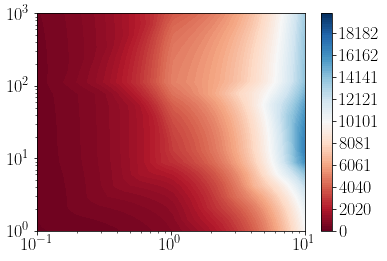

In [4]:
Xi,Yi=np.meshgrid(np.logspace(-2,1,50),np.logspace(0,3,20))
triang=tri.Triangulation(X,Y)
interpZ=tri.LinearTriInterpolator(triang,par_av)
Zi=interpZ(Xi,Yi)
plt.contourf(Xi, Yi, Zi,levels=np.linspace(0,20000,100),cmap='RdBu')#,alpha=0.6)
        #ax.contour(Xi, Yi, Zi,colors='k',levels=levels,linewidths=0.3)
plt.loglog()
plt.xlim(0.1,10)

plt.colorbar()

In [19]:
[print(ii, ii+1) for ii in range(0,9)]

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9


[None, None, None, None, None, None, None, None, None]